In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from copy import deepcopy
from merlin.util import spatialfeature as sf
from shapely import geometry
import scanpy as sc
import anndata as an

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.pyplot import rc_context

In [2]:
codebook = pd.read_csv('codebook_0_VZG105A_codebook.csv')

region_list = glob(str(os.getcwd()+'/ExportBarcodes/region_*/barcodes.csv'))

transcript_list = []
for n, region in enumerate(region_list):
    transcripts = pd.read_csv(region, index_col=0)
    print(len(transcripts))
    transcripts['region'] = n  
    for i, r in codebook.iterrows():
        transcripts.loc[transcripts['barcode_id']== i, 'gene'] = r['name']    
    #print(transcripts[n].shape)
    #print(transcripts[n].fov.min(), transcripts[n].fov.max())
    transcript_list.append(transcripts)
    
transcripts_all = pd.concat(transcript_list, axis=0).reset_index()
transcript_list = []
transcripts_all = transcripts_all.drop(['index'], axis=1)


376511
559805
578644
541124
465119
674617
360069
482052
283341


<Figure size 432x288 with 0 Axes>

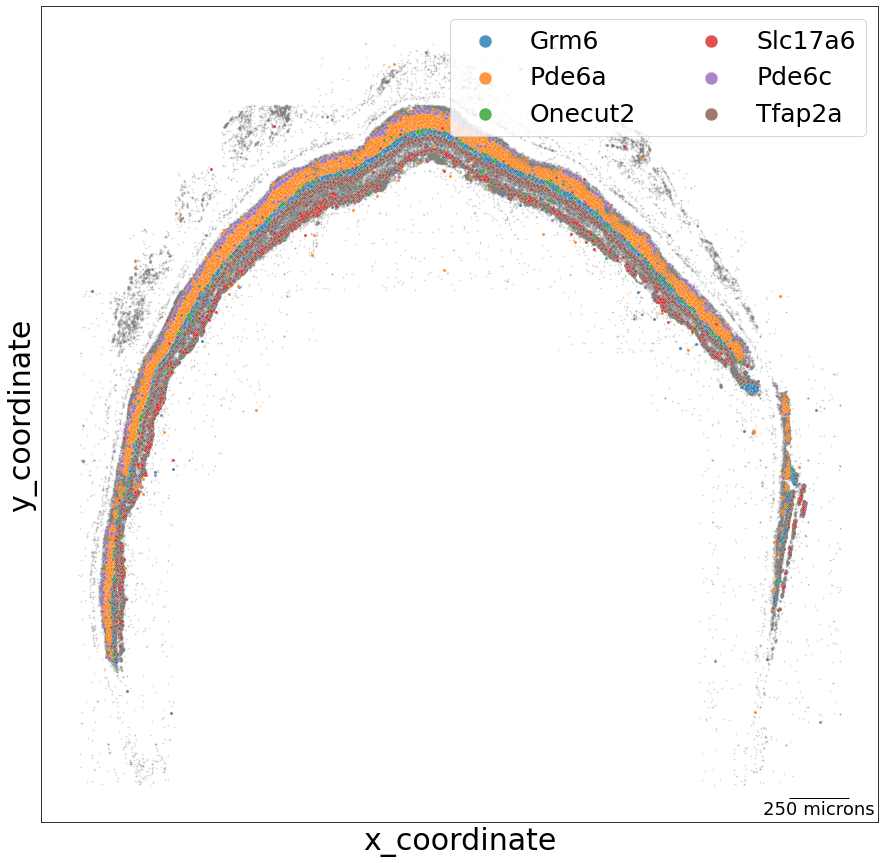

In [3]:
section_n = 5
transcript_indv = transcripts_all[transcripts_all['region']==section_n]

matplotlib.rcParams.update({'font.size': 30})
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(transcript_indv['global_x'], transcript_indv['global_y'], s=1, c = 'gray', alpha=0.2)

gene_names = ['Grm6', 'Pde6a', 'Onecut2', 'Slc17a6', 'Pde6c', 'Tfap2a']
colors = np.random.rand(len(gene_names),).tolist()

plt.xlabel("x_coordinate")
plt.ylabel("y_coordinate")
plt.xticks([])
plt.yticks([])

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           250, '250 microns', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
for c, n in zip (colors, gene_names):
     ax.scatter(transcript_indv[transcript_indv['gene'] == n]['global_x'],
          transcript_indv[transcript_indv['gene'] == n]['global_y'], label=n,
             s=10, alpha=0.8, edgecolors = 'white', linewidths = 0.2)
ax.legend(scatterpoints=1, markerscale =4, fontsize=25, loc= 'upper right', bbox_to_anchor = (1,1), ncol = 2)        


In [4]:
transcripts_all['color'] = pd.Series('black', index=transcripts_all.index.tolist())
transcripts_all['z'] = pd.Series(0, index=transcripts_all.index.tolist())
transcripts_all['cell_index'] = pd.Series(-1, index=transcripts_all.index.tolist())

transcripts_all

barcode_id    global_x    global_y  global_z           x           y  \
0                37   489.18802  11090.8890       3.0   825.51855   833.41693   
1                48   498.41602  11027.6370       4.0   910.96290   247.74533   
2                83   468.99530  11124.3600       0.0   638.54880  1143.33520   
3               108   441.54462  11083.1430       4.0   384.37610   761.69006   
4               113   441.65620  11034.2980       0.0   385.40915   309.42746   
...             ...         ...         ...       ...         ...         ...   
4321277         279  7611.84670   1980.7816       0.0   104.06394  1672.57010   
4321278         291  7781.50800   1941.6240       4.0  1675.00000  1310.00000   
4321279         297  7747.12450   1976.0030       4.0  1356.63320  1628.32400   
4321280         325  7630.95650   1998.2866       5.0   281.00418  1834.65340   
4321281         346  7807.98730   1842.6074       4.0  1920.17910   393.17905   

         fov  region     gene  color  z  cell_index  
0        566       0   Chrnb3  black  0          -1  
1        566       0  Fam19a4  black  0          -1  
2        566       0     Gad2  black  0          -1  
3        566       0  Slc35d3  black  0          -1  
4        566       0   Igfbp5  black  0          -1  
...      ...     ...      ...    ... ..         ...  
4321277  186       8    Nr2e3  black  0          -1  
4321278  186       8      Id2  black  0          -1  
4321279  186       8      Rax  black  0          -1  
4321280  186       8    Nr2f1  black  0          -1  
4321281  186       8   Dmrtb1  black  0          -1  

[4321282 rows x 12 columns]

In [5]:
segmentation_files = glob(str(os.getcwd()+'/cellpose_mesmer_wholecell_nuclei_intercept/*_cb2_cellpose_mesmer_wholecell_nuclei_intercept.txt'))
position_file = pd.read_csv('positions.csv', header=None, names=['X', 'Y'])
segmentation_files

['C:\\Users\\jongsuc\\Documents\\210507_mouse_retin_105a_JC_trial3/cellpose_mesmer_wholecell_nuclei_intercept\\hal-config-749z7-638z7-546z7-477z9-405z7_000_cb2_cellpose_mesmer_wholecell_nuclei_intercept.txt',
 'C:\\Users\\jongsuc\\Documents\\210507_mouse_retin_105a_JC_trial3/cellpose_mesmer_wholecell_nuclei_intercept\\hal-config-749z7-638z7-546z7-477z9-405z7_001_cb2_cellpose_mesmer_wholecell_nuclei_intercept.txt',
 'C:\\Users\\jongsuc\\Documents\\210507_mouse_retin_105a_JC_trial3/cellpose_mesmer_wholecell_nuclei_intercept\\hal-config-749z7-638z7-546z7-477z9-405z7_002_cb2_cellpose_mesmer_wholecell_nuclei_intercept.txt',
 'C:\\Users\\jongsuc\\Documents\\210507_mouse_retin_105a_JC_trial3/cellpose_mesmer_wholecell_nuclei_intercept\\hal-config-749z7-638z7-546z7-477z9-405z7_003_cb2_cellpose_mesmer_wholecell_nuclei_intercept.txt',
 'C:\\Users\\jongsuc\\Documents\\210507_mouse_retin_105a_JC_trial3/cellpose_mesmer_wholecell_nuclei_intercept\\hal-config-749z7-638z7-546z7-477z9-405z7_004_cb2_cell

In [6]:
def split_list(ini_polygon):
    fov_size = 2048
    even_list = []
    odd_list = []
    for i in range(len(ini_polygon)):
        if i % 2 == 0:
            # y 
            even_list.append(fov_size - ini_polygon[i])
        else:
            # x
            odd_list.append(ini_polygon[i])
            
    return [even_list, odd_list]

def fov_coordinates_to_global(fov, fovCoordinates):
        fovStart = get_fov_offset(fov)
        micronsPerPixel = 0.108
        if len(fovCoordinates) == 2:
            return (fovStart[0] + fovCoordinates[0]*micronsPerPixel,
                    fovStart[1] + fovCoordinates[1]*micronsPerPixel)
        elif len(fovCoordinates) == 3:
            zPositions = self.dataSet.get_z_positions()
            return (np.interp(fovCoordinates[0], np.arange(len(zPositions)),
                              zPositions),
                    fovStart[0] + fovCoordinates[1]*micronsPerPixel,
                    fovStart[1] + fovCoordinates[2]*micronsPerPixel)
        
def get_fov_offset(fov: int):
        """Get the offset of the specified fov in the global coordinate system.
        This offset is based on the anticipated stage position.
        Args:
            fov: index of the field of view
        Returns:
            A tuple specifying the x and y offset of the top right corner
            of the specified fov in pixels.
        """
        # TODO - this should be implemented using the position of the fov.
        return position_file.loc[fov]['X'], position_file.loc[fov]['Y']

In [7]:
list_assigned = []
fov_size = 2048

min_cells = 150
meta_cell = pd.DataFrame()
for file_index, file in enumerate(segmentation_files):
    
    fov_pad = file.split('405z7_')[1].split('_')[0]
    fov = np.int64(fov_pad)
    
    if file_index % 50 == 0:
        print(file_index)
    
    # load transcripts
    transcripts_fov = deepcopy(transcripts_all[transcripts_all.fov == fov])
    region_n = transcripts_fov['region'].iloc[0]
    # segmentation
    #####################
    f = open(file, 'r')
    lines = f.readlines()
    
    lines = [x.replace('\n', '') for x in lines]    
    f.close()    
    
    for poly_index, polygon in enumerate(lines):
        if len(polygon) > 0:
            polygon = [np.int64(x) for x in polygon.split(',')]
            coords = split_list(polygon)

            # make spatial feature
            poly_list_tuples = [tuple([x[1], x[0]]) for x in pd.DataFrame(coords).transpose().values.tolist()]
            cell_polygon = geometry.Polygon(poly_list_tuples)

            # polygon list of a cell within a single z plane
            poly_part_list = [cell_polygon]
            # polygon list at different z planes
            poly_z_list = [poly_part_list]

            cell_name = np.int64(str(poly_index + 1) + str(fov_pad))
            cell = sf.SpatialFeature(poly_z_list, uniqueID=cell_name, 
                                            fov=fov, zCoordinates=[0])        

            meta_cell.loc[cell_name, 'volume'] = cell.get_volume()

            currentBB = cell.get_bounding_box()
            currentCenter = [(currentBB[0]+currentBB[2])/2, (currentBB[1]+currentBB[3])/2]
                                   
            meta_cell.loc[cell_name, 'center_x'] = fov_coordinates_to_global(fov, currentCenter)[0]
            meta_cell.loc[cell_name, 'center_y'] = fov_coordinates_to_global(fov, currentCenter)[1]
            meta_cell.loc[cell_name, 'region'] = region_n
            
            transcripts_bb = transcripts_fov[(transcripts_fov.x >= currentBB[0]) &
                                              (transcripts_fov.y >= currentBB[1]) &
                                              (transcripts_fov.x <= currentBB[2]) &
                                              (transcripts_fov.y <= currentBB[3])]        

            if transcripts_bb.shape[0] > 0:
                containedList = cell.contains_positions(transcripts_bb.loc[:, ['x', 'y', 'z']].values)
                found_transcripts = transcripts_bb[containedList].index.tolist()

                # save cell_name to transcripts_fov
                transcripts_fov.loc[found_transcripts, 'color'] = 'blue'
                transcripts_fov.loc[found_transcripts, 'cell_index'] = cell_name
                
                transcript_count = len(found_transcripts)
                
            else:
                transcript_count = 0
            meta_cell.loc[cell_name, 'assigned_transcripts'] = transcript_count

    list_assigned.append(transcripts_fov)

transcripts_assigned = pd.concat(list_assigned, axis=0)
transcripts_assigned.shape

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800


(4321282, 12)

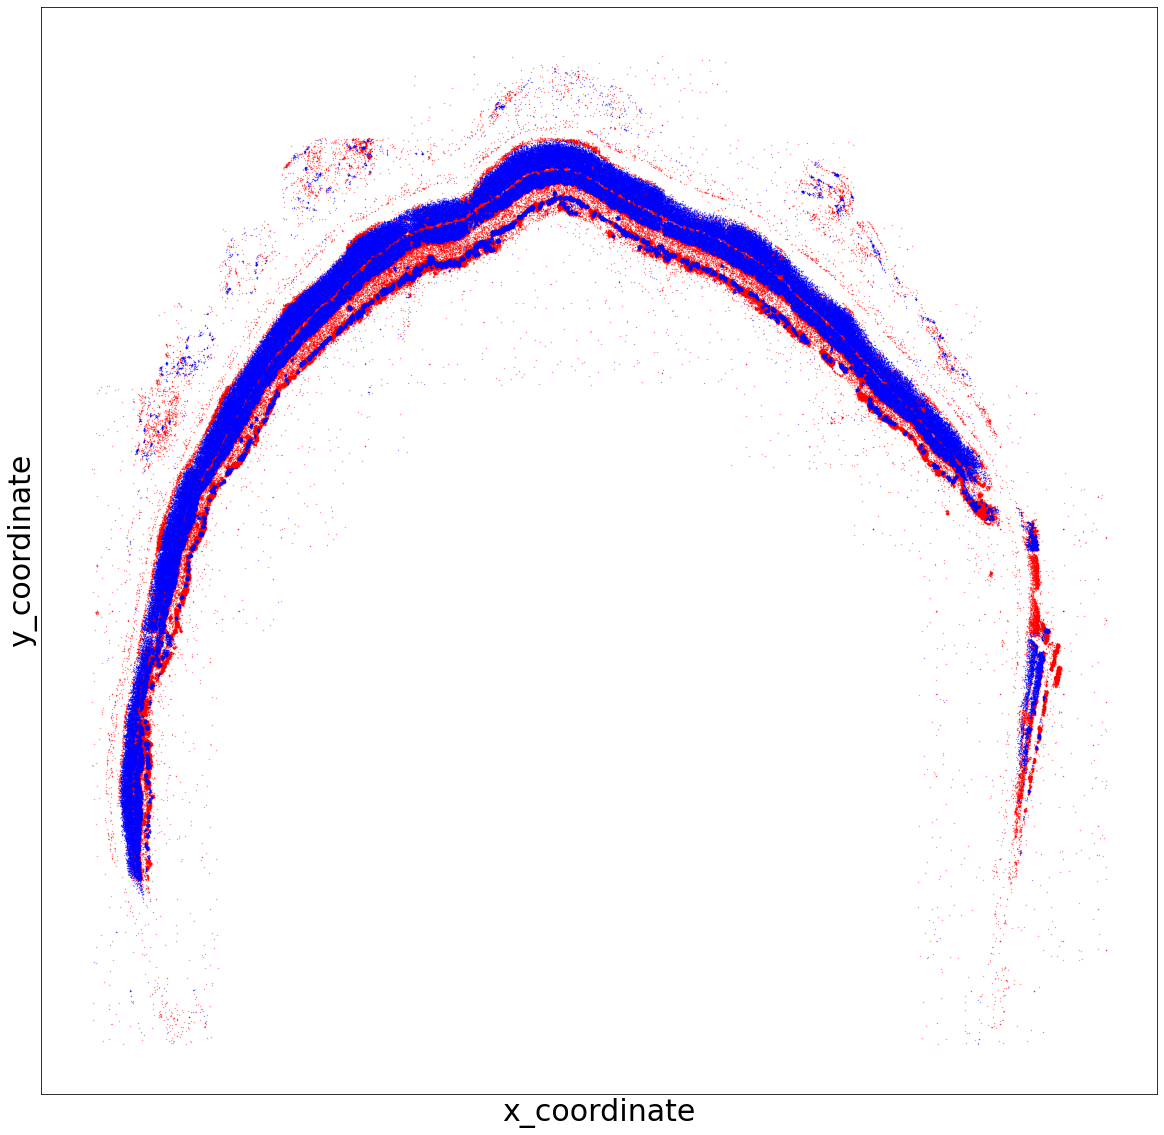

In [8]:
section_n = 5

transcript_indv = transcripts_assigned[transcripts_assigned['region']==section_n]

assigned = transcript_indv[transcript_indv['cell_index'] != -1]
unassigned = transcript_indv[transcript_indv['cell_index'] == -1]

plt.figure(figsize=(20,20))
plt.scatter(unassigned.global_x, unassigned.global_y, s=0.1, c='red', alpha=0.6)
plt.scatter(assigned.global_x, assigned.global_y, s=0.1, c='blue', alpha=0.6)
plt.xlabel("x_coordinate")
plt.ylabel("y_coordinate")

plt.xticks([])
plt.yticks([])

fontprops = fm.FontProperties(size=25)
scalebar = AnchoredSizeBar(ax.transData,
                           250, '250 microns', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

In [9]:
gex = transcripts_assigned.groupby('cell_index')['gene'].value_counts().unstack().fillna(0).transpose()
gex = gex.drop([-1], axis=1)
gex.index.name = None
gex.columns.name = None
gex.shape

(368, 84021)

In [10]:
min_counts = 10
ser_sum = gex.sum(axis=0)
keep_cells = ser_sum[ser_sum >= min_counts].index.tolist()

meta_filtered = meta_cell.loc[keep_cells]
meta_filtered
cellMetadata = [meta_filtered]
cellByGene = [gex[keep_cells].T]

In [11]:
for i, m in enumerate(cellMetadata):
    m['dataset'] = i
allFeatures = pd.concat(cellMetadata)
allBarcodes = pd.concat(cellByGene)
allFeatures['barcodeCount'] = allBarcodes.sum(axis=1).values

allFeatures

volume  center_x  center_y  region  assigned_transcripts  dataset  \
1151    1640.0    48.870 -4944.974     8.0                  31.0        0   
1247    2422.5  3622.194 -1862.084     6.0                  13.0        0   
1312    2981.5  3012.852  1032.670     4.0                  20.0        0   
1733    1112.0  1424.030  4815.012     2.0                  13.0        0   
1793    3013.5  4010.422  4714.372     1.0                  18.0        0   
...        ...       ...       ...     ...                   ...      ...   
819711  4309.5   713.670  4180.792     2.0                  77.0        0   
821711  5430.0   756.816  4148.230     2.0                 195.0        0   
822711  4451.5   766.698  4208.656     2.0                  33.0        0   
823711  4544.0   790.026  4158.436     2.0                 117.0        0   
824711  3301.0   792.618  4095.796     2.0                  58.0        0   

        barcodeCount  
1151            11.0  
1247            13.0  
1312            20.0  
1733            13.0  
1793            18.0  
...              ...  
819711          77.0  
821711         195.0  
822711          33.0  
823711         117.0  
824711          58.0  

[58310 rows x 7 columns]

c:\users\jongsuc\anaconda3\envs\merlin_env\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\users\jongsuc\anaconda3\envs\merlin_env\lib\site-packages\anndata\_core\anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1151, 1247, 1312, 1733, 1793]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


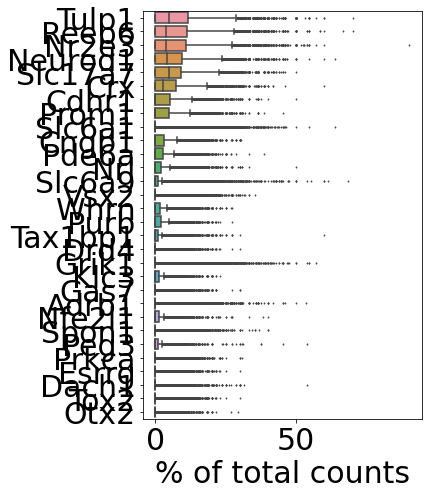

c:\users\jongsuc\anaconda3\envs\merlin_env\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


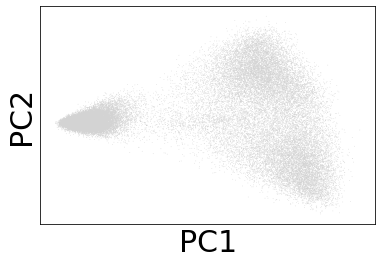

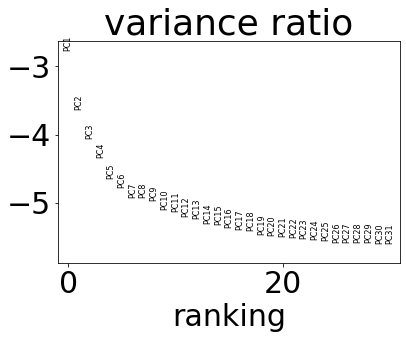

In [12]:
ad = an.AnnData(allBarcodes)
ad.obs = allFeatures
sc.pl.highest_expr_genes(ad, n_top=30, )
ad.layers['counts']=ad.X.copy()
adRaw = ad.copy()
sc.pp.normalize_total(ad)
sc.pp.log1p(ad)
sc.pp.scale(ad, max_value=10)

sc.tl.pca(ad, svd_solver='arpack')
sc.pl.pca(ad)
sc.pl.pca_variance_ratio(ad, log=True)
sc.pp.neighbors(ad, n_neighbors=12, n_pcs=20)
sc.tl.umap(ad)
sc.tl.leiden(ad, resolution = 1)


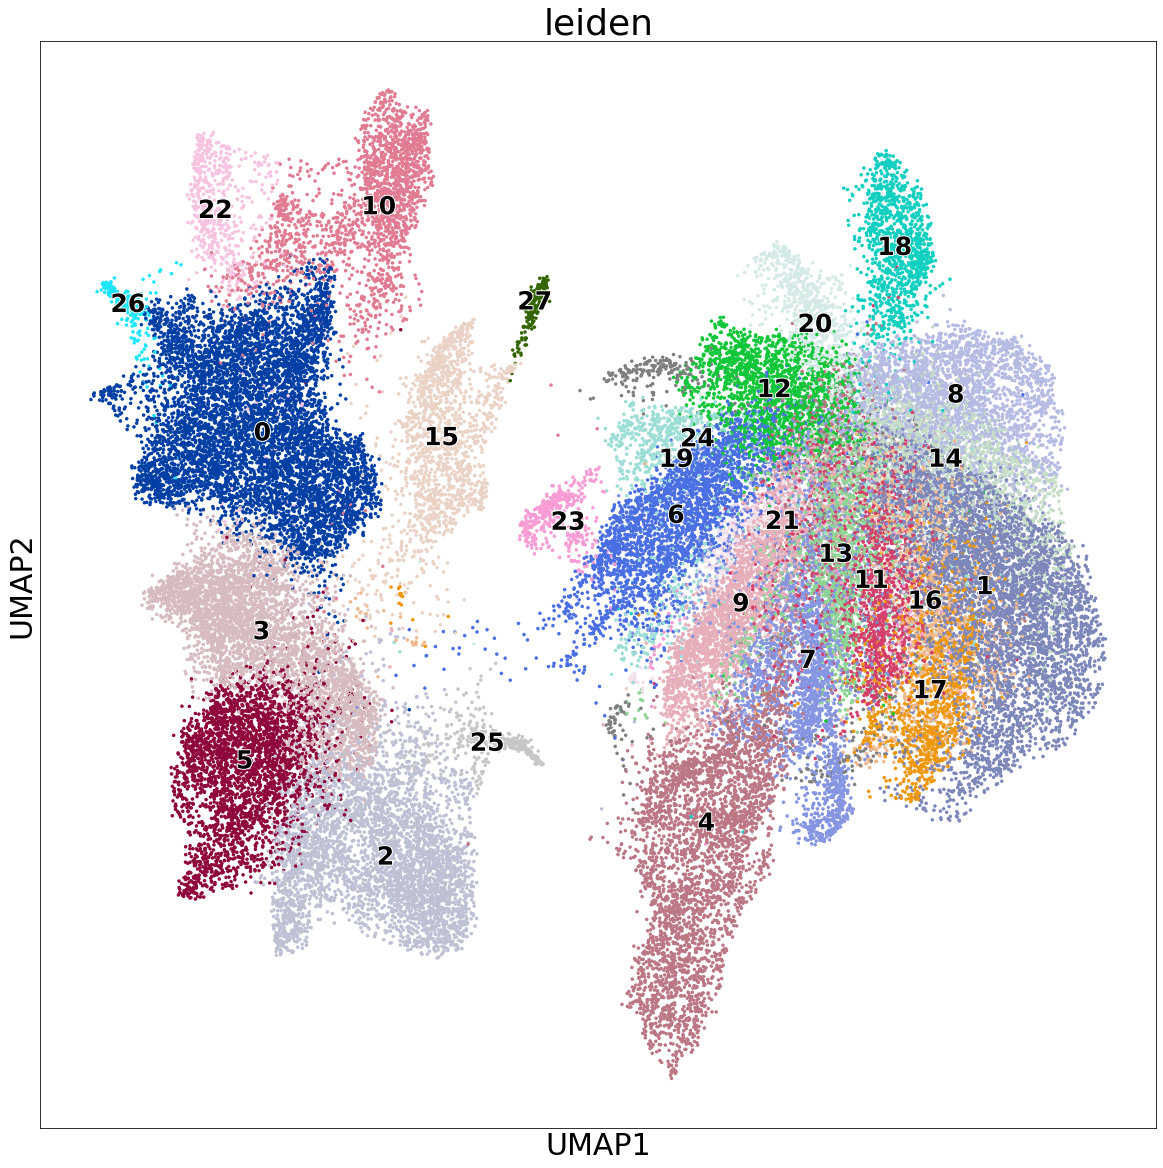

In [14]:
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(ad, s = 50, alpha=1, color='leiden', vmax=4, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

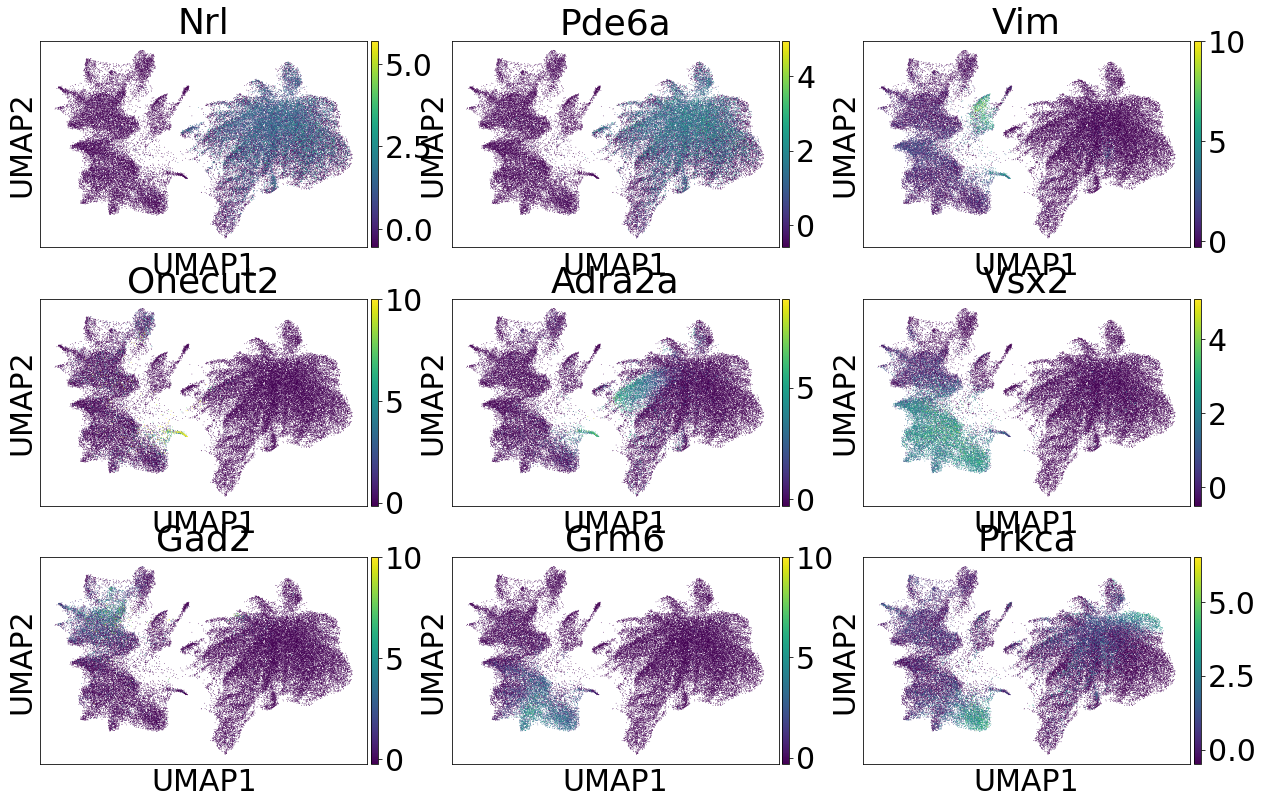

In [15]:
sc.pl.umap(ad, alpha=1, color=['Nrl','Pde6a','Vim','Onecut2','Adra2a', 'Vsx2','Gad2','Grm6','Prkca'], ncols=3)

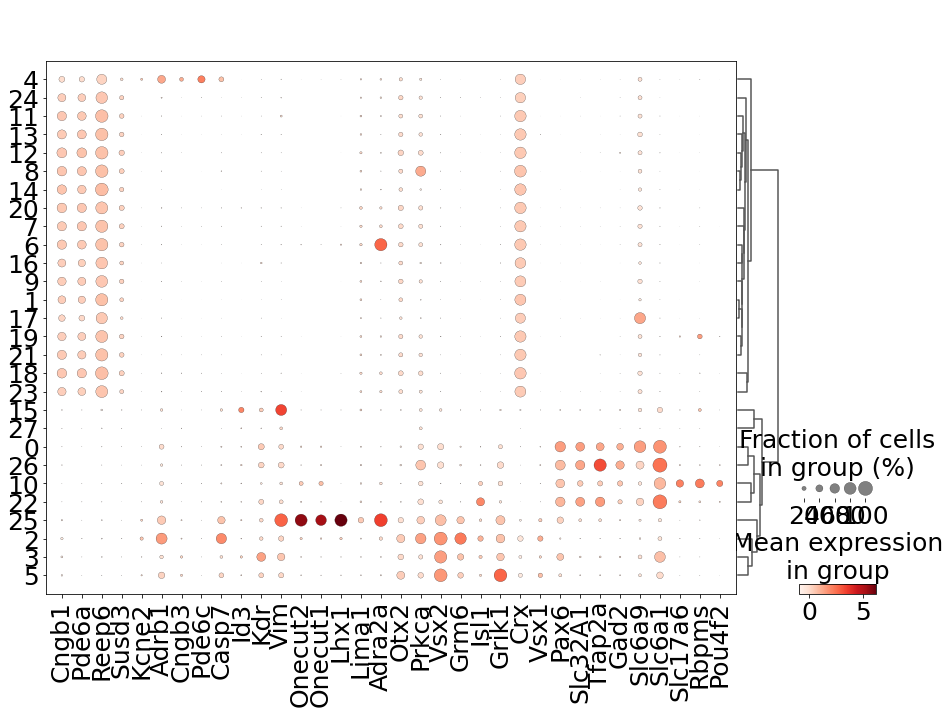

In [16]:
markers = ["Cngb1","Pde6a","Reep6","Susd3","Kcne2","Adrb1","Cngb3", 
                          "Pde6c","Casp7", "Id3","Kdr","Vim","Onecut2","Onecut1","Lhx1",
                          "Lima1","Adra2a","Otx2", "Prkca","Vsx2","Grm6","Isl1","Grik1",
                          "Crx","Vsx1","Pax6","Slc32A1","Tfap2a", "Gad2","Slc6a9","Slc6a1",
                          "Slc17a6","Rbpms","Pou4f2"]
sc.pl.dotplot(ad, markers, groupby='leiden', dendrogram=True)

In [20]:
cluster_annotation = {
     '10': 'RGC', 
     '0': 'AC', '22': 'AC', '25': 'AC', '26': 'AC',
     '25': 'HC', 
     '15': 'MG', 
     '2': 'BC', '3': 'BC', '5': 'BC', 
     '4': 'Cone',
     '23': 'Rod', '18': 'Rod', '21': 'Rod', '19': 'Rod', '17': 'Rod',
     '1': 'Rod', '9': 'Rod', '16': 'Rod', '6': 'Rod', 
     '7': 'Rod', '20': 'Rod', '14': 'Rod', '8': 'Rod',
     '12': 'Rod', '13': 'Rod', '11': 'Rod', '24': 'Rod',
     '27': "NN"}
                        
# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
ad.obs['celltype'] = ad.obs['leiden'].map(cluster_annotation).astype('category')

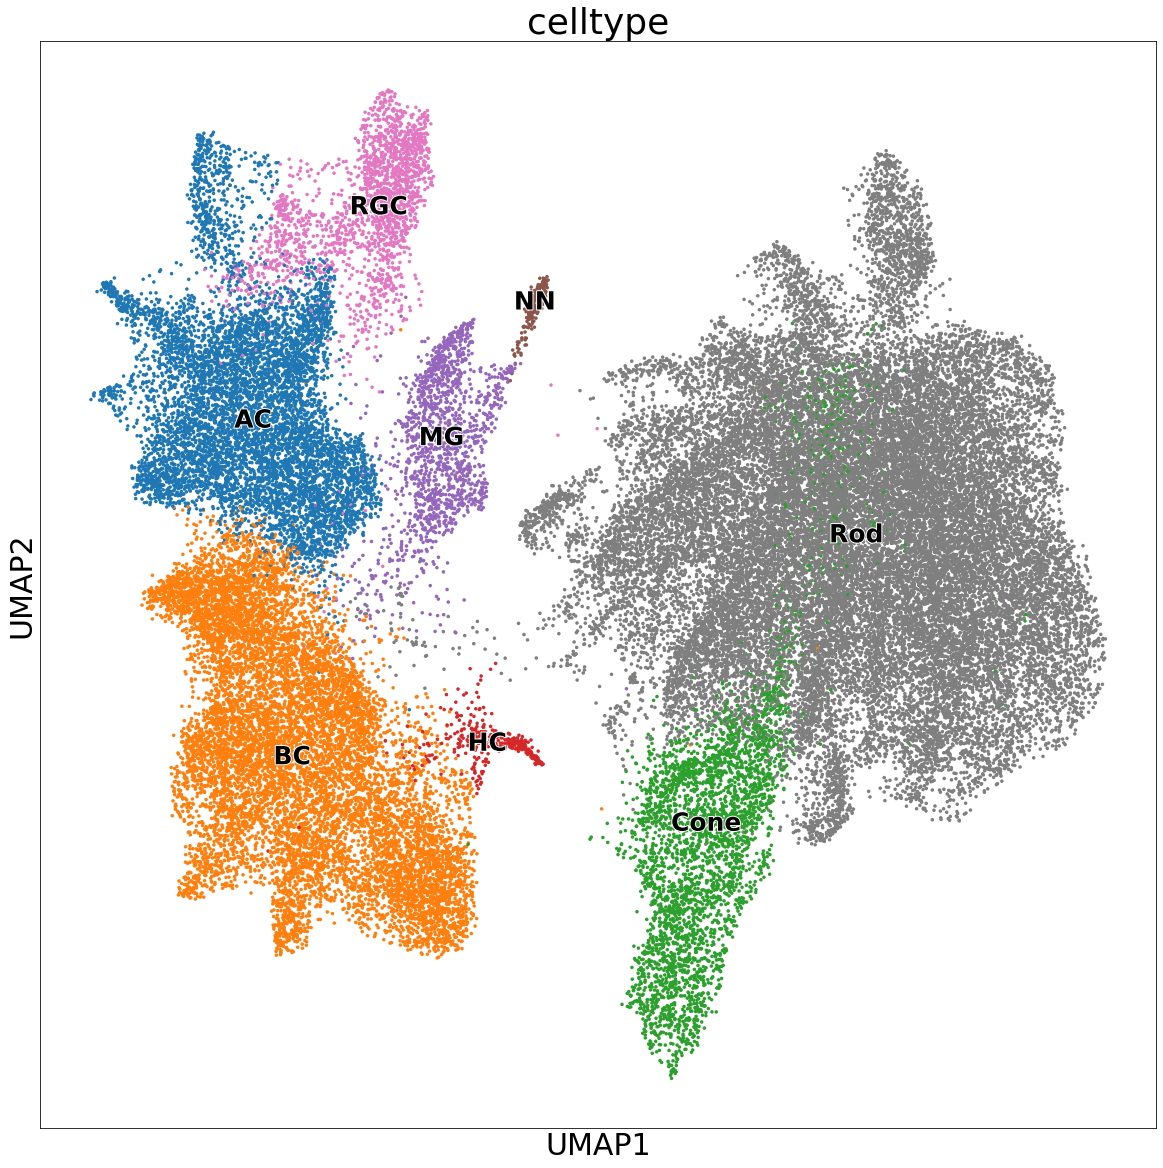

In [21]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(ad, s = 50, alpha=1, color='celltype', vmax=4, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

<Figure size 432x288 with 0 Axes>

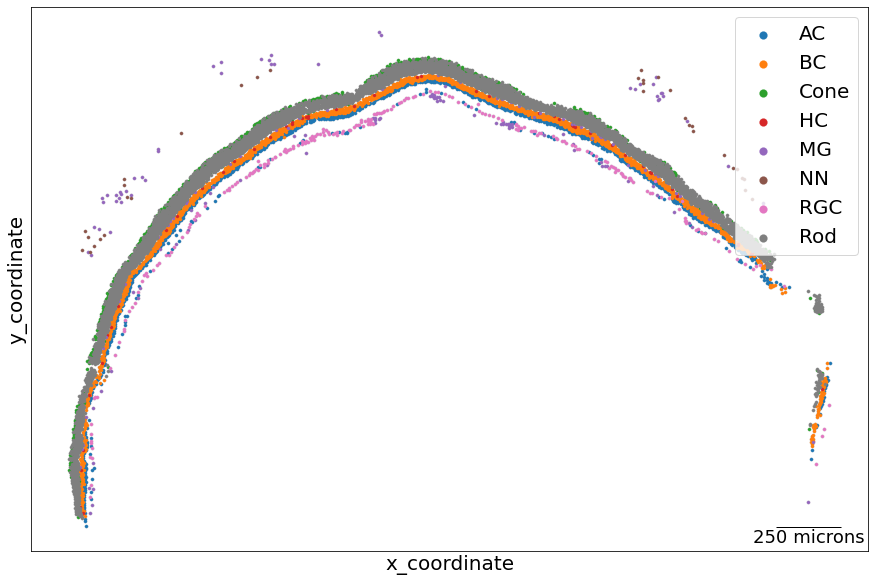

In [22]:
region_plot = ad[ad.obs.region == 5].obs

cluster_names = region_plot['celltype'].unique().tolist()
cluster_names = sorted([x for x in cluster_names if x == x])


plt.figure()
fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(region_plot['center_x'], region_plot['center_y'],s=10, alpha=1, c='0.9')

for n in cluster_names:
    ax.scatter(region_plot[region_plot['celltype'] == n]['center_x'],
           region_plot[region_plot['celltype'] == n]['center_y'], label=n,
             s=10, alpha=1, linewidths = 0.2)

ax.legend(scatterpoints=1, fontsize=20, markerscale=2.5, loc='upper right')
plt.xlabel("x_coordinate", fontsize=20)
plt.ylabel("y_coordinate", fontsize=20)

plt.xticks([])
plt.yticks([])

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           250, '250 microns', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
plt.show()
        